In [47]:
import numpy as np
import mnist # for CNN we want the non-flatten mnist dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [29]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [30]:
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


In [31]:
# Normalizing the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [32]:
# Reshaping the images (keras expects a 3D array)
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [54]:
num_filters = 8
filter_size = 3
pool_size = 2

# Building the model.
model_1 = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [55]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compiling the model.
model_1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [76]:
# Training the model.
history_1 = model_1.fit(
  train_images,
  to_categorical(train_labels),
  validation_split=0.2,
  epochs=3,
  batch_size=32
)

Epoch 1/3
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1072 - accuracy: 0.9683 - val_loss: 0.1041 - val_accuracy: 0.9716
Epoch 2/3
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0912 - accuracy: 0.9736 - val_loss: 0.0937 - val_accuracy: 0.9737
Epoch 3/3
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0809 - accuracy: 0.9756 - val_loss: 0.0969 - val_accuracy: 0.9727


In [77]:
# Store the predictions
predictions = model_1.predict(test_images) # It contains a 10D array with the probability for each category (i.e. numbers from 0 to 9)
predicted = np.argmax(predictions, axis=1) # we recover the most probable number

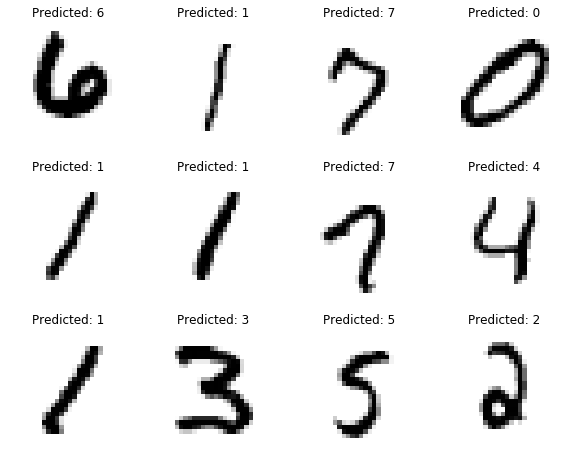

In [78]:
# We randomly pick 12 images
#print(test_images[3])
images = test_images.reshape((-1, 28, 28))

select = np.random.randint(test_images.shape[0], size=12)

fig = plt.figure(figsize=(10,8))
# We plot the images with their prediction
for index, value in enumerate(select):
    fig.add_subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow((images[value]+0.5)*255,cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(predicted[value]))


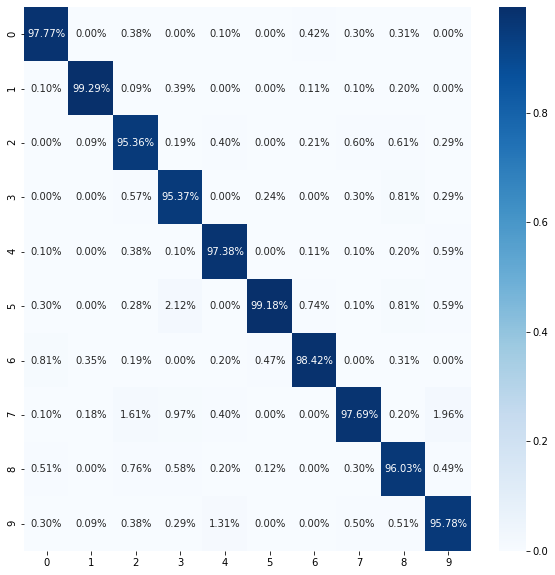

In [79]:
#On a more quantitative level we can plot the confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix / sum(cf_matrix), fmt = '.2%', annot=True, cmap='Blues')

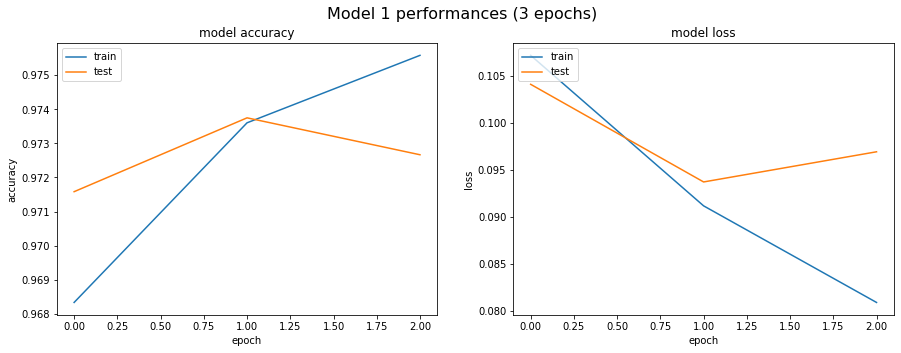

In [80]:
# Let's see the performances of the model over epochs:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.add_subplot(1,2,2)
plt.title("Loss")
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.suptitle('Model 1 performances (3 epochs)', fontsize=16)
plt.show()

In [83]:
# Evaluating the model.
score_1 = model_1.evaluate(
  test_images,
  to_categorical(test_labels)
)
print('This model achieved {:.3f} test loss and {:.2f} % accuracy'.format(score_1[0], score_1[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0895 - accuracy: 0.9720
This model achieved 0.090 test loss and 97.20 % accuracy


In [41]:
# Let's try with a second convolutional layer
model_2 = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  Conv2D(num_filters, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [53]:
# Compiling the model.
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [84]:
# Training the model.
history_2 = model_2.fit(
  train_images,
  to_categorical(train_labels),
  validation_split=0.2,
  epochs=3,
  batch_size=32
)

Epoch 1/3
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.0811 - val_accuracy: 0.9763
Epoch 2/3
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0818 - val_accuracy: 0.9778
Epoch 3/3
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0803 - val_accuracy: 0.9794


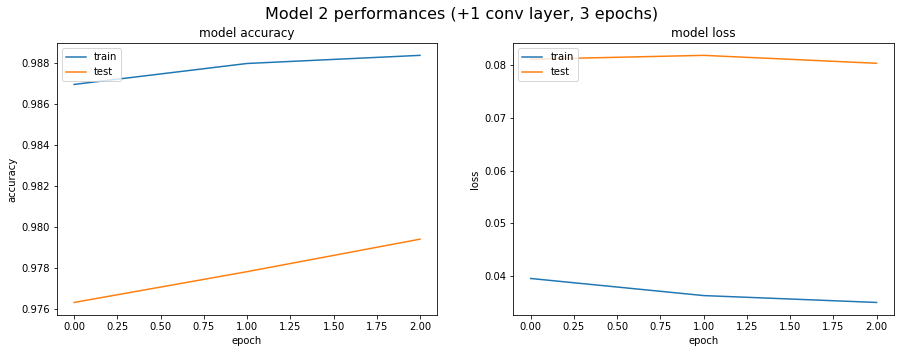

In [85]:
# Let's see the performances of the model over epochs:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.add_subplot(1,2,2)
plt.title("Loss")
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.suptitle('Model 2 performances (+1 conv layer, 3 epochs)', fontsize=16)
plt.show()

In [86]:
# Evaluating the model.
score_2 = model_2.evaluate(
  test_images,
  to_categorical(test_labels)
)
print('This model achieved {:.3f} test loss and {:.2f} % accuracy'.format(score_2[0], score_2[1]*100))

313/313 [==============================] - 1s 5ms/step - loss: 0.0842 - accuracy: 0.9785
This model achieved 0.084 test loss and 97.85 % accuracy


In [87]:
# LEt's try with some dropout to avoid overfitting
model_3 = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Dropout(0.5),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [88]:
# Compiling the model.
model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Training the model.
history_3 = model_3.fit(
  train_images,
  to_categorical(train_labels),
  validation_split=0.2,
  epochs=3,
  batch_size=32
)

Epoch 1/3
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4870 - accuracy: 0.8547 - val_loss: 0.2310 - val_accuracy: 0.9379
Epoch 2/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2785 - accuracy: 0.9183 - val_loss: 0.1789 - val_accuracy: 0.9517
Epoch 3/3
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2435 - accuracy: 0.9270 - val_loss: 0.1598 - val_accuracy: 0.9562


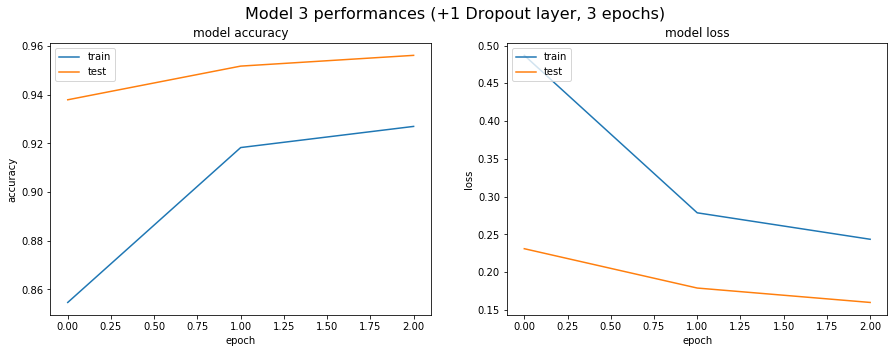

In [90]:
# Let's see the performances of the model over epochs:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.add_subplot(1,2,2)
plt.title("Loss")
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.suptitle('Model 3 performances (+1 Dropout layer, 3 epochs)', fontsize=16)
plt.show()

In [91]:
# Evaluating the model.
score_3 = model_3.evaluate(
  test_images,
  to_categorical(test_labels)
)
print('This model achieved {:.3f} test loss and {:.2f} % accuracy'.format(score_3[0], score_3[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.1573 - accuracy: 0.9544
This model achieved 0.157 test loss and 95.44 % accuracy
